# House Price Prediction


In [1]:
# #import the necessary libraries
import pandas as pd

In [2]:
#Read the dataset and analyze it

housing = pd.read_csv("housing_pbl_final.csv")

In [3]:
#It helps to display the first 5  information
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#undersatnd each and every feature of the data immediately from 'housing' in my house price prediction folder,
#We have to know about every feature becoz we have to work for someon's business


In [5]:
housing.info() #this function helps us to tell the total entries in our data amd it will help us to analyze whether the data is null Or not!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    object 
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [6]:
# #Chas is an categorical value data
# #If i want to check how many entries are there in a particular columm then we'll use following function:

housing['CHAS'].value_counts()
# #according to it's output it means that, in 35 rows, there are 1's and in 471 rows there are 0's

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe() 
# #This function is help to describe all the required parameters to analyze that what is the mean, stndrd deviaton. etc. It will very helpful for a data scientist to analyze their data mathmetically
# # mean- average
# #Stndrd dviaition - distance of the value from mean


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


In [8]:
# #Now i want to visualize my data using histograms here only, so to do this I use
%matplotlib inline

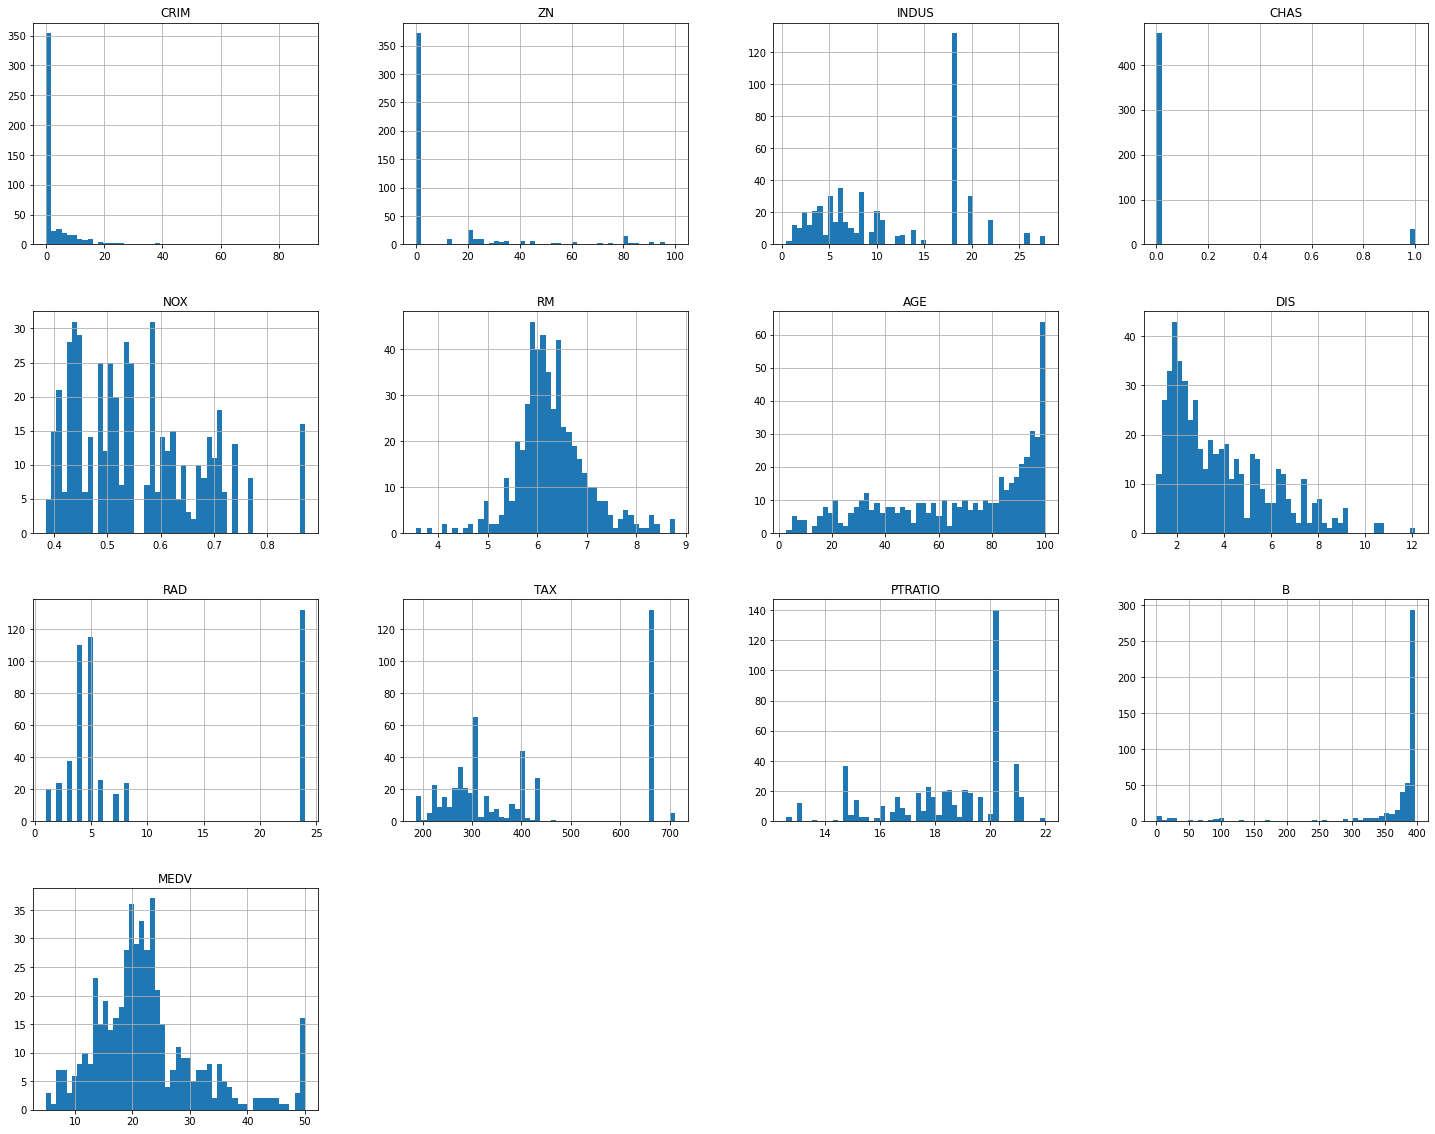

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize=(25,20)) #In data science module, sanjay sir taught us this in histogram section
plt.show()

# #MEDV bar shows the cost of house in $'s

<AxesSubplot:ylabel='Frequency'>

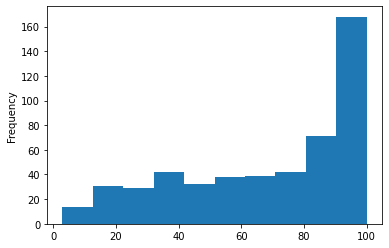

In [10]:
# #IF i want to obtain the histogram only AGE
housing['AGE'].plot.hist()
# (This is just for knowledge)

## Training-testing Splitting

In [11]:
#Now to get the proper accuracy we have to split our data into training and testing dataset and using testing dataset we find the
#accuracy

In [12]:
import numpy as np
def split_train_test(data, test_ratio): # Data and test_ratios are 2 arguements that are passed in function
    shuffled = np.random.permutation(len(data)) #It help to shuffle the numbers
    test_set_size = int(len(data)*test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] #iloc function use in various process, but here it use to Selecting a range of rows from the DataFrame.

In [13]:
train_dataset,test_dataset = split_train_test(housing, 0.2) #Function is call here that we declare above

In [14]:
print(f"Rows in train dataset: {len(train_dataset)}\nRows in test dataset: {len(test_dataset)}\n")

Rows in train dataset: 405
Rows in test dataset: 101



In [15]:
#So, here we split our data into training and testing datasets where, there are 101 rows in testing dataset and 405 rows in training dataset

#But here is a problem that if we print the shuffled data then, it will shows all the values of our whole dataset which we don't want
#in testing dataset, we just only want the values of 101 rows only 
#To make this possible, we use seed function of random number generator

In [16]:
#I do this part just for knowledge:
# import numpy as np
# def split_train_test(data, test_ratio): # Data and test_ratios are 2 arguements that are passed in function
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data)) #It help to shuffle the numbers
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio) 
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_dataset,test_dataset = split_train_test(housing, 0.2) #Function is call here
# print("Rows in test dataset are:",len(test_dataset))
# print("Rows in train dataset are:",len(train_dataset))

In [17]:
#The code which we write above is also available in sk learn(Scie-kit learn)
#Let's use sklearn library:

In [18]:
from sklearn.model_selection import train_test_split
train_dataset, train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train dataset: {len(train_dataset)}\nRows in test dataset: {len(test_dataset)}\n")

Rows in train dataset: 405
Rows in test dataset: 101



In [19]:
#Now we want to divide every variable into train and test dataset equally so, for that
#here we use stratified shuffle split(From sklearn lib), using this every variable will be divide into both type of dataset equally

from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42) #Parameters are: (n_splits(Default-10), test_size, train_size, random_state)
for train_index, test_index in split.split(housing, housing['CHAS']): #Here 'chas' is an important source
    strat_train_dataset = housing.loc[train_index]
    strat_test_dataset = housing.loc[test_index]

In [20]:
#Here we describe our test dataset

strat_test_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,50.000000


In [21]:
#Here we check the details of all the variables in test dataset
strat_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    object 
 13  MEDV     102 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 12.0+ KB


In [22]:
#Here we count 0's and 1's in test dataset:

strat_test_dataset['CHAS'].value_counts()
#Test dataset mein zero values wale 95 hain aur 1 value wale 7

0    95
1     7
Name: CHAS, dtype: int64

In [23]:
#Here we describe our train dataset:

strat_train_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


In [24]:
#Here we check the details of all the variables in train dataset:

strat_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    object 
 13  MEDV     404 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 47.3+ KB


In [25]:
#Here we count 0's and 1's in train dataset:

strat_train_dataset['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [26]:
#Train dataset mein zero values wale 376 hain aur 1 value wale 28

In [27]:
#and if we compare the value counts in test and train dataset by dividng the value of 0's and 1's then:

#Test dataset:

95/7

13.571428571428571

In [28]:
#Train dataset:

376/28

13.428571428571429

In [29]:
#Here we conclude that the ratio of test and train dataset get almost same

In [30]:
housing = strat_train_dataset.copy() #Here we copy our training datasets, now housing is the training dataset

## Check Correlations

In [31]:
#Now first we make the correlation matrix

In [32]:
#.corr() is the method of pandas library

In [33]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
Name: MEDV, dtype: float64

## Pandas Plotting

In [34]:
#Now we explain, what the pearson correlation co-efficient is:

#If we increase one value then other val will also inc then it is called strong +ve corelation, 
#like MEDV then 1.000 is strong +ve correlation.
# and if we increase one value then other value will obviosly decrease and it is called strong -ve correlation

In [35]:
#There are total 14 features in our dataset then obviosuly it's hard to plot 14 graphs
#that's why we plot using correlation values

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

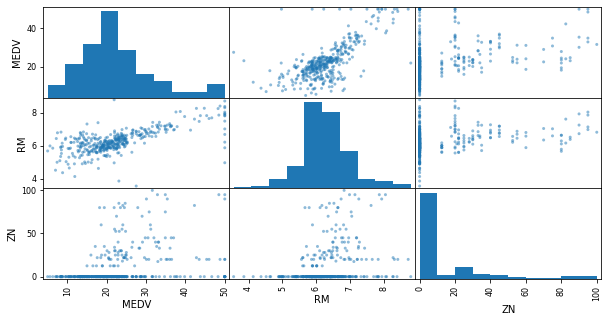

In [36]:
#There are total 14 features in our dataset then obviosuly it's hard to plot 14 graphs
#that's why we plot using correlation values

#Import the necessary library of pandas for plotting

from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN"]
scatter_matrix(housing[attributes],figsize=(10,5))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

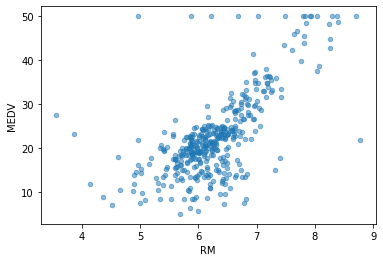

In [37]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.5)

In [38]:
#According to above graph, we notice that some values are incorrect. for example, graph says that 5 rooms of 50 rs and also 7,8,9 rooms of same 50 rs. so obviosuly it's impossible
#Hence, some values are incorrect in this above graph. Now we have to remove this

#THAT'S WHY WE MAKE CORELATION MATRIX HERE

## Combination of attributes:

In [39]:
housing["TAXRM"]= housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [40]:
#Here we recall the corr matrix of MEDV
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
Name: MEDV, dtype: float64

In [41]:
#here taxrm has strong -ve correlatiom

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

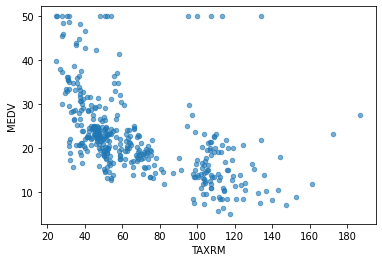

In [42]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.6)

In [43]:
#Graph shows that taxrm has the strong -ve correlation values.

In [44]:
housing = strat_train_dataset.drop("MEDV", axis = 1)
housing_labels = strat_train_dataset["MEDV"].copy()
#In this way, we can seperate features and labels

  ## Missing Attributes

In [45]:
# How to deal with missing attributes?
# Ans- To deal with missing values we have 3 options:
    
#     1) Get rid of the missing data points
#     2) Ge rid of the whole attribute
#     3) Set the value to some value(0,mean or median)
    

In [46]:
#NOTE: RM Is very importany feature of this project, because as the RM is increase the price of house will increase

In [47]:
#Option 1

a=housing.dropna(subset = ["RM"]) 
a.shape

(399, 13)

In [48]:
#Option 2
housing.drop("RM", axis = 1) #RM column will remove 
#Here axis is the concept of pandas as we studies in data science module
#axis = 0 or 1
#axis = 0 => removing rows
#axis = 1 => removing columns

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [49]:
housing.drop("RM", axis = 1).shape
#Our original dataset is unchanged

(404, 12)

In [50]:
median = housing["RM"].median()
#Our original dataset is unchanged

In [51]:
median

6.209

In [52]:
#Option 3

housing["RM"].fillna(median)
#The value of median will fill at the place of 'na'
#Our original dataset is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [53]:
housing.shape

(404, 13)

In [54]:
#Here we find the median of training dataset and put the value of median in the RM.
#Now it may be possible that in the test dataset, there are some values that are missing and may be in that dataset,
#there is no column of RM. 
#So, in that column of testing dataset we also have to put the value of median in that RM column


#This will possible by 'Imputer' class of sklearn library

In [55]:
#IMPORTANT::::


# Little bit about Imputer class:
#     1) Imputer is the class of sklearn
#     2) There are 2 main parameter we can pass in this function:
#         a) missing values (whatever u have)
#         b) strategy (mean Or median Or etc...)
#     3) syntax to import is:
#         from sklearn.impute import SimpleImputer
#         imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
        

In [56]:
housing.describe()
#Before we started imputing filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000


## Imputing to deal with Missing attributes

In [57]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = "median")
# # imputer.fit(housing)

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [59]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [60]:
imputer.statistics_.shape

(13,)

In [61]:
X = imputer.transform(housing)

In [62]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [63]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [64]:
#RM values are change in output of housing.describe() and housing_tr.describe().
#If we compare the  housing.describe() result and housing_tr.describe reuslt, missing values in RM are fulfil in housing_tr.describe().

## Little bit about sci-kit library

In whole sk-learn library, there are primarily 3 objects:
    
    1) Estimators-It estimates some parameters that is based on a dataset(For ex - imputer)
    -It also have fit and transform method.
    fit method - do fits the dataset and calculates internal parameters
    Transform method - may be do transform (but not always).
    
    2) Transformers - it takes input and returns output based on the learnings from fit().
    -It also have a convenience fn called fit_transform()
    which fits and then do transforms.
    
    3) Predictors - LinearRegression model is an example of predictor. Fit() and predict() are two common functions. 
    It also gives score() function which will evaluate the predictions

## Feature scaling:
Two types of Feature scaling methods:

1) Min-max scaling(Normalization):
    (value-min)/(max-min) #It helps to bring all the values in a same scale (0-1)
    
    Sklearn provides a class called MinMaxScaler for this.
    
2) Standardization:
    (value-mean)/standard deviation.
    sklearn provide a class that is called StandardScaler for this.

## Creating a pipeline

In [65]:
# Pipeling means - i have to code like this, that we can easily change in the code and also we can change strategies in our program
# We can do series of steps

In [66]:
from sklearn.pipeline import Pipeline
#Here we us standard scaler class:

from sklearn.preprocessing import StandardScaler
pipelin = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #We can add as many as we want, in pipeline
    ('std_scaler', StandardScaler())
])

In [67]:
housing_num_tr = pipelin.fit_transform(housing) 
#Here we work on 'housing_tr' dataset
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [68]:
#This is numpy array
#here we use the 3rd mthod of sklearn i.e., -> Predictors

In [69]:
housing_num_tr.shape

(404, 13)

## Now we have to select the desired model for our project

In [70]:
#As this is an supervised learning, so we use Linear Regression that returns the output in numerical values
#(We import decison Tree later, abhi bs linear regression pr hi work krna hai aur check krna hai ki ye mse aur rmse ki values kesi derha hai fr baad mei decision Tree model ko import karenge)


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#(Ensemble means to combine many classifier or regressor and make classifie or regressor is called ensemble)
our_model = RandomForestRegressor()
# our_model = DecisionTreeRegressor()
# our_model = LinearRegression() 

our_model.fit(housing_num_tr, housing_labels)



#in this we have to seperate features and labels
 #NOTE: - > See the cell that above the missing attributes heading

RandomForestRegressor()

In [71]:
#Here we train our LinearRegression model

In [72]:
some_data = housing.iloc[:5]

In [73]:
some_labels = housing_labels.iloc[:5]

In [74]:
my_prepared_data = pipelin.transform(some_data) #My data is pass through pipeline

In [75]:
our_model.predict(my_prepared_data)

array([22.298, 25.124, 16.256, 23.398, 23.643])

In [76]:
#These are my predictions, now we will check these predictions with my labels

In [77]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [78]:
#Now I compute rms value

## Evaluating our model

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
housing_predictions = our_model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions) #mse - mean square error
rmse = np.sqrt(mse) #rmse - root mean square error
rmse

1.218506824432312

In [81]:
#(The value is genrate from linear regression is heavy error ,(compare this with some_labels))
#So we discard, our model and now we will use Decision Tree model
#See the cell right down to Desired model heading, we import the decision Tree class there:

In [82]:
# Wow using decision Tree model error is 0, but this is called overfitting that is not good
# bcoz ths data is not learn trained dataset,it's only learn noise dataset

## Using better evaluation Technique - Cross Validation

In [83]:
#In this, our approach will be like: as i've 10 grps in our TRAINING Dataset
# 1 2 3 4 5 6 7 8 9 10
# step:1 -> 1 (as a test data) and 2-10(as a training data)
# step:2 -> 2 (as a test data) and 1-10(as a training data, except 2)
# step:3 -> 3 (as a test data) and 1-10(as a training data, except 3)
# step:4 -> 4 (as a test data) and 1-10(as a training data, except 4)
# .
# .
# .
# n

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(our_model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.89176806, 2.89903732, 4.51940947, 2.70365765, 3.60761171,
       2.6875718 , 4.97185289, 3.37919354, 3.24867738, 3.32395789])

In [85]:
#This is the output of decision Tree model which is better than linear Regression

#DECISION TREE > LINEAR REGRESSION

In [86]:
#RMSE VALUE USING LINEAR REGRESSION MODEL:

# 4.835301058716238

#RMSE SCORES OUTPUT USING LINEAR REGRESSION MODEL:

# array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
#        4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])


In [87]:
#RMSE VALUE USING DECISION TREE MODEL:
# 0.0

#RMSE SCORES OUTPUT USING DECISION TREE MODEL IS:
# array([3.76676739, 5.66122886, 5.16021365, 3.90968154, 4.03633497,
#        3.28918683, 5.34181617, 3.90060893, 3.44894912, 4.26256965])

In [88]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [89]:
print_scores(rmse_scores)

Scores: [2.89176806 2.89903732 4.51940947 2.70365765 3.60761171 2.6875718
 4.97185289 3.37919354 3.24867738 3.32395789]
Mean:  3.423273770207717
Standard deviation:  0.727482561982301


In [90]:
#To save our project

In [91]:
from joblib import dump, load
dump(our_model, 'House Price Prediction Project.joblib')

['House Price Prediction Project.joblib']

## Testing the model on test data

In [93]:
X_test = strat_test_dataset.drop("MEDV", axis = 1)
Y_test = strat_test_dataset["MEDV"].copy()
X_test_prepared = pipelin.transform(X_test)
final_predictions = our_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'L'

In [94]:
my_prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [ ]:
from joblib import dump,load
import numpy as np
model = load('House Price Prediction Project.joblib')

features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -94.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)